<a href="https://colab.research.google.com/github/baldeoJV/CCDEPLRL_EXERCISES/blob/main/Exercise6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 6

In [154]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [155]:
import numpy as np
import pandas as pd

path = "https://github.com/robitussin/CCDEPLRL_EXERCISES/blob/9b8ac1c5683abecc144f0af47eb7cda0688e12b7/dataset/reviews.json?raw=true"

dataset = pd.read_json(path)

In [156]:
dataset.head()

,review,rating
0,sir okay armygreen shorts nice,5
1,di pareha yong mga size nila may sobrang liit ...,5
2,super worth it ang ganda Sombra grabi order na...,5
3,ganda po salamat,5
4,maayos pagkadeliver maganda den sya,5


In [157]:
review = dataset['review'].tolist()
rating = dataset['rating'].tolist()

# Separate out the sentences and labels into training and test sets
training_size = int(len(review) * 0.8)

training_review = review[0:training_size]
testing_review = review[training_size:]
training_rating = rating[0:training_size]
testing_rating = rating[training_size:]

# Map ratings: 3-5 → 1 (positive), 1-2 → 0 (negative)
def map_rating_to_sentiment(rating_list):
    return [1 if int(r) > 3 else 0 for r in rating_list]

training_sentiment = map_rating_to_sentiment(training_rating)
testing_sentiment = map_rating_to_sentiment(testing_rating)

training_rating_final = np.array(training_sentiment)
testing_rating_final = np.array(testing_sentiment)


## 1. Tokenize the data

In [158]:
vocab_size = 1500
embedding_dim = 16
max_length = 22
trunc_type = 'post'
padding_type = 'post'
oov_tok = ""

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_review)

# (word -> integer ID)
word_index = tokenizer.word_index


## 2. Sequence the data

In [159]:
training_sequences = tokenizer.texts_to_sequences(training_review)
testing_sequences = tokenizer.texts_to_sequences(testing_review)


## 3. Pad the data

In [160]:
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## 4. Train a sentiment model

In [161]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.build(input_shape=(None, max_length)) # force build
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 22, 16)         │        24,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_10     │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           102 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,109 (94.18 KB)

 Trainable params: 24,109 (94.18 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
num_epochs = 40
history = model.fit(training_padded, training_rating_final, epochs=num_epochs, validation_data=(testing_padded, testing_rating_final))

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5526 - loss: 0.6898 - val_accuracy: 0.2139 - val_loss: 0.7285
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5648 - loss: 0.6769 - val_accuracy: 0.2139 - val_loss: 0.7444
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6009 - loss: 0.6564 - val_accuracy: 0.2189 - val_loss: 0.7521
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6556 - loss: 0.6318 - val_accuracy: 0.2289 - val_loss: 0.7569
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6699 - loss: 0.6219 - val_accuracy: 0.2687 - val_loss: 0.7520
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7304 - loss: 0.5860 - val_accuracy: 0.3682 - val_loss: 0.7442
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 0.5728 - val_accuracy: 0.3781 - val_loss: 0.7493
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7723 - loss: 0.5373 - val_accuracy: 0.5274 - val_loss

## Get files for visualing the network

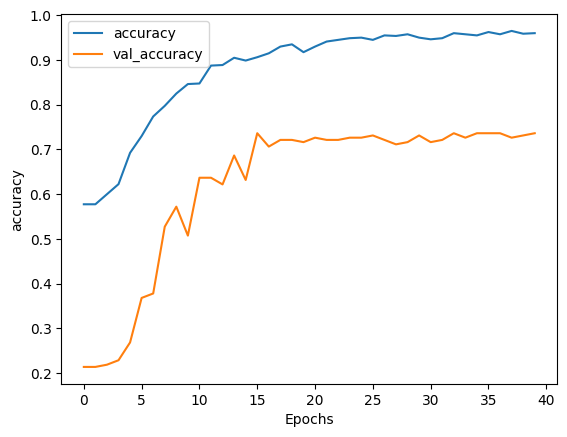

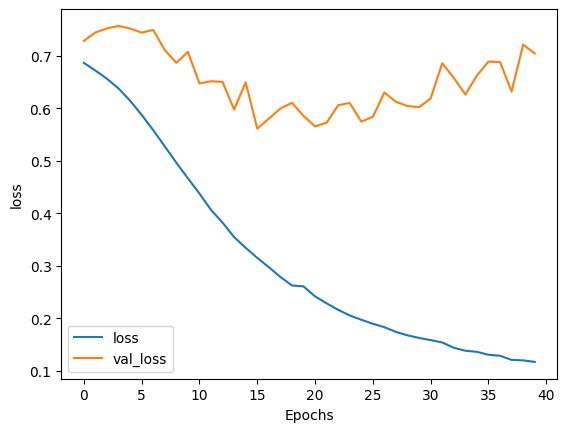

In [163]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [164]:
# First get the weights of the embedding layer
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(1500, 16)


In [165]:
# import io

# # Create the reverse word index
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# # Write out the embedding vectors and metadata
# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')
# for word_num in range(1, vocab_size):
#     word = reverse_word_index.get(word_num, "")  # safer with get
#     embeddings = weights[word_num]
#     out_m.write(word + "\n")
#     out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
# out_v.close()
# out_m.close()

In [166]:
# # Download the files
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

In [167]:
print("Number of embeddings:", len(weights))       # Should be vocab_size
print("Number of words in metadata:", len(word_index))  # May be less than vocab_size


Number of embeddings: 1500
Number of words in metadata: 3131


## 5. Predict sentiment with new reviews

In [172]:
# Example new reviews (Taglish style) for delivery of clothes/shoes
fake_reviews = [
    "Sobrang bilis ng delivery, thank you!",
    "Medyo late yung sapatos na dumating",
    "Ayos yung damit, exactly sa picture",
    "Not happy sa quality ng tshirt, manipis",
    "Perfect fit yung shorts, love ko!",
    "Hindi gumana yung zipper ng jacket",
    "pakiayos nakakainis inis na inis ako. hindi gumagana lahat",
    "ang panget naman neto hindi ko to nagustuhan yuck",
    "sakto lang",
    "sana hindi nalang ako bumili",
    "I need refund",
    "maganda ang panget",
    "pasado ang bagsak"

]

print(fake_reviews)

# Create the sequences
padding_type='post'
sample_sequences = tokenizer.texts_to_sequences(fake_reviews)
fakes_padded = pad_sequences(sample_sequences, padding=padding_type, maxlen=max_length)

print('\nHOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!\n')

classes = model.predict(fakes_padded)

# The closer the class is to 1, the more positive the review is deemed to be
for x in range(len(fake_reviews)):
  print(fake_reviews[x])
  print(classes[x])
  print('\n')



['Sobrang bilis ng delivery, thank you!', 'Medyo late yung sapatos na dumating', 'Ayos yung damit, exactly sa picture', 'Not happy sa quality ng tshirt, manipis', 'Perfect fit yung shorts, love ko!', 'Hindi gumana yung zipper ng jacket', 'pakiayos nakakainis inis na inis ako. hindi gumagana lahat', 'ang panget naman neto hindi ko to nagustuhan yuck', 'sakto lang', 'sana hindi nalang ako bumili', 'I need refund', 'maganda ang panget', 'pasado ang bagsak']

HOT OFF THE PRESS! HERE ARE SOME NEWLY MINTED, ABSOLUTELY GENUINE REVIEWS!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
Sobrang bilis ng delivery, thank you!
[0.99212986]


Medyo late yung sapatos na dumating
[0.39868355]


Ayos yung damit, exactly sa picture
[0.45327628]


Not happy sa quality ng tshirt, manipis
[0.06640819]


Perfect fit yung shorts, love ko!
[0.9784631]


Hindi gumana yung zipper ng jacket
[0.03491956]


pakiayos nakakainis inis na inis ako. hindi gumagana lahat
[0.20281817]


ang panget naman neto hindi ko to nagustuha